In [1]:
import pandas as pd
import numpy as np
import xarray as xr

from scipy.stats import norm
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
file = xr.open_dataset('/Users/victoriaford/Downloads/CWOP_AP153.nc')
df = file.to_dataframe()
df = df.reset_index()
df['month'] = pd.to_datetime(df['time']).dt.month

In [3]:
df

,station,time,tas,hurs,sfcWind,sfcWind_dir,ps_altimeter,tas_qc,sfcWind_qc,tdps_derived,ps_derived,elevation,lat,lon,month
0,CWOP_AP153,2003-09-16 16:30:00,283.16,53.0,0.00,289.0,NaN,nan,nan,273.93,NaN,1406.0424,41.543,-120.5332,9
1,CWOP_AP153,2003-09-16 17:00:00,284.83,44.0,0.90,263.0,NaN,nan,nan,272.88,NaN,1406.0424,41.543,-120.5332,9
2,CWOP_AP153,2003-09-16 17:30:00,287.05,39.0,5.36,305.0,NaN,nan,nan,273.22,NaN,1406.0424,41.543,-120.5332,9
3,CWOP_AP153,2003-09-16 18:00:00,287.61,37.0,4.47,296.0,NaN,nan,nan,273.00,NaN,1406.0424,41.543,-120.5332,9
4,CWOP_AP153,2003-09-16 18:30:00,288.72,35.0,3.13,254.0,NaN,nan,nan,273.22,NaN,1406.0424,41.543,-120.5332,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,CWOP_AP153,2005-03-08 18:00:00,281.49,66.0,0.00,247.0,86725.20,nan,nan,275.44,73203.68,1406.0424,41.543,-120.5332,3
8931,CWOP_AP153,2005-03-08 18:15:00,282.61,62.0,0.00,342.0,86725.20,nan,nan,275.62,73203.68,1406.0424,41.543,-120.5332,3
8932,CWOP_AP153,2005-03-08 18:30:00,283.72,60.0,0.00,224.0,86725.20,nan,nan,276.20,73203.68,1406.0424,41.543,-120.5332,3
8933,CWOP_AP153,2005-03-08 20:15:00,290.38,35.0,0.90,349.0,86639.45,nan,nan,274.70,73131.30,1406.0424,41.543,-120.5332,3


In [4]:
# run through months instead of all data
df_month = df.loc[df['month'] == 10]

In [5]:
vars_to_remove = ['duration', 'method', 'lat', 'lon', 'elevation', 'qc', 'station', 'time', 'month']
[d for d in df.columns if not any(True for item in vars_to_remove if item in d)]

['tas', 'hurs', 'sfcWind', 'sfcWind_dir', 'tdps_derived', 'ps_derived']

In [6]:
var = 'tas'

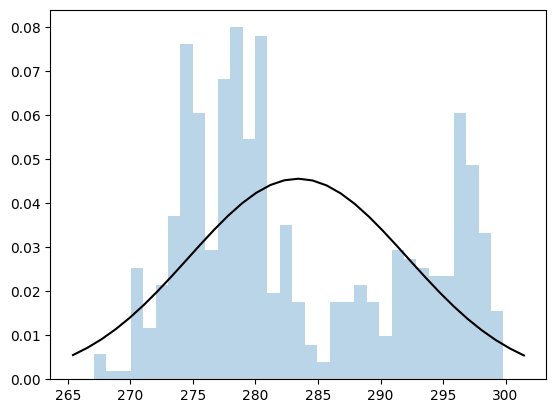

In [7]:
num_bins = int(df_month[var].max()) + 1 - int(df_month[var].min())
mu, std = norm.fit(df_month[var].dropna()) 
plt.hist(df_month[var], bins=num_bins, density=True, alpha=0.3) # Plot the histogram.
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, num_bins)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k') # Plot the PDF.

In [8]:
# interquartile range
q1 = df_month[var].quantile(0.25)
q3 = df_month[var].quantile(0.75)

iqr = q3 - q1
print(iqr)

15.560000000000002


In [9]:
df2 = df[['time', 'tas', 'month']]

In [10]:
df2

,time,tas,month
0,2003-09-16 16:30:00,283.16,9
1,2003-09-16 17:00:00,284.83,9
2,2003-09-16 17:30:00,287.05,9
3,2003-09-16 18:00:00,287.61,9
4,2003-09-16 18:30:00,288.72,9
...,...,...,...
8930,2005-03-08 18:00:00,281.49,3
8931,2005-03-08 18:15:00,282.61,3
8932,2005-03-08 18:30:00,283.72,3
8933,2005-03-08 20:15:00,290.38,3


In [11]:
# climatology monthly median values
df_med_clim = df2.groupby(df['time'].dt.month).median(numeric_only=True)
df_med_clim = df_med_clim.rename(columns={'tas': 'tas_clim'})

In [12]:
# each individaul month median values
df_med_all = df2.resample('M', on='time').median(numeric_only=True)
df_med_all

,tas,month
time,,
2003-09-30,294.830,9.0
2003-10-31,296.490,10.0
2003-11-30,277.050,11.0
2003-12-31,274.270,12.0
2004-01-31,274.270,1.0
2004-02-29,276.490,2.0
2004-03-31,286.490,3.0
2004-04-30,288.160,4.0
2004-05-31,287.610,5.0


In [13]:
df_test2 = df_med_all.merge(df_med_clim.reset_index()[['month', var+'_clim']])

In [14]:
df_test2['anom'] = df_test2['tas'] - df_test2['tas_clim']
df_test2

,tas,month,tas_clim,anom
0,294.830,9.0,291.49,3.340
1,289.830,9.0,291.49,-1.660
2,296.490,10.0,280.38,16.110
3,280.105,10.0,280.38,-0.275
4,277.050,11.0,272.05,5.000
5,271.490,11.0,272.05,-0.560
6,274.270,12.0,274.83,-0.560
7,274.830,12.0,274.83,0.000
8,274.270,1.0,274.27,0.000
9,273.720,1.0,274.27,-0.550


In [15]:
# all monthly medians are converted to anomalies from calendar monthly median

test_df = df_med_all.merge(df_med_clim.reset_index(), on='month', how='left')
# test_df['anom'] = test_df['']

# df = df.merge(monthly_means.reset_index(), on='month', how='left')
# df['Diff']=df['Mean']-df['Values']

In [ ]:
# create a dataframe that is the time, month, mean, and anom

In [25]:
test_df['anom'] = test_df['tas_x'] - test_df['tas_y']

In [26]:
test_df

,tas_x,hurs_x,sfcWind_x,sfcWind_dir_x,ps_altimeter_x,tdps_derived_x,ps_derived_x,elevation_x,lat_x,lon_x,...,hurs_y,sfcWind_y,sfcWind_dir_y,ps_altimeter_y,tdps_derived_y,ps_derived_y,elevation_y,lat_y,lon_y,anom
0,294.830,22.0,0.90,231.0,NaN,270.630,NaN,1406.0424,41.543,-120.5332,...,31.0,0.90,228.0,85982.00,272.950,72576.35,1406.0424,41.543,-120.5332,3.340
1,296.490,28.0,1.34,238.5,NaN,276.140,NaN,1406.0424,41.543,-120.5332,...,63.0,0.45,171.0,85867.67,273.060,72479.85,1406.0424,41.543,-120.5332,16.110
2,277.050,86.0,0.90,149.0,NaN,274.890,NaN,1406.0424,41.543,-120.5332,...,67.0,0.00,183.5,86610.86,266.385,73107.17,1406.0424,41.543,-120.5332,5.000
3,274.270,78.0,0.45,180.5,NaN,270.640,NaN,1406.0424,41.543,-120.5332,...,69.0,0.00,175.0,86325.02,269.200,72865.89,1406.0424,41.543,-120.5332,-0.560
4,274.270,76.0,0.45,175.5,NaN,270.325,NaN,1406.0424,41.543,-120.5332,...,74.0,0.45,176.0,86039.17,269.660,72624.61,1406.0424,41.543,-120.5332,0.000
5,276.490,74.0,0.90,166.0,85553.24,271.305,72214.44,1406.0424,41.543,-120.5332,...,72.0,0.90,160.0,85953.42,271.040,72552.23,1406.0424,41.543,-120.5332,-0.560
6,286.490,43.5,1.34,193.5,86210.68,272.770,72769.38,1406.0424,41.543,-120.5332,...,45.0,1.34,201.0,86239.26,272.540,72793.50,1406.0424,41.543,-120.5332,1.110
7,288.160,35.0,1.34,192.0,86153.51,273.380,72721.12,1406.0424,41.543,-120.5332,...,35.0,1.34,192.0,86153.51,273.380,72721.12,1406.0424,41.543,-120.5332,0.000
8,287.610,46.0,2.68,226.0,85781.91,274.830,72407.46,1406.0424,41.543,-120.5332,...,46.0,2.68,226.0,85781.91,274.830,72407.46,1406.0424,41.543,-120.5332,0.000
9,297.610,25.0,2.68,205.0,85810.50,275.930,72431.59,1406.0424,41.543,-120.5332,...,25.0,2.68,205.0,85810.50,275.930,72431.59,1406.0424,41.543,-120.5332,0.000


In [ ]:
# standardize against IQR range

# value = (value - median) / (q3 - q1)

In [ ]:
## part 1
## compare anomalies of monthly median values

# standardize against interquartile range, and compare stepwise from the middle of the distribution outwards
# asymmetries are identified and flagged if severe

In [ ]:
## part2 

# compare all observations in a single month, all years
# histogram created from all obs and gaussian distribution is fitted
# threshold values are determined using positions where fitted frequency falls below y=0.1
# and rounding outwards to the next integer plus one
# going outwards from center, distribution is scanned for gaps which occur outside threshold value
# obs beyond gap are flagged


## gaussian distribution may not be a perfect fit for bulk of obs, with thresholds too high
## allow for non-zero skew and kurtosis by using gauss-hermite series
## updated thresholds occur closer to bulk of distribution curve